# Visualizacion

Para visualizar se puede usa openTSNE, una implementacion de TSNE mas rapida de que la de sklearn

In [56]:
import importlib
import pickle
import matplotlib.pyplot as plt
#import model 
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
from h3 import h3
from tqdm import tqdm

import visualizer
import funciones as fn
%matplotlib inline

In [ ]:

users = pickle.load(open("data/users.p", "rb"))
visits = pickle.load(open("data/visits.p", "rb"))
props = pickle.load(open("data/props.p", "rb"))

grafos = pickle.load(open("data/grafos.p", "rb"))
grafos_test = pickle.load(open("data/grafos_test.p", "rb"))

In [53]:
data_type = {"users": users, "props": props}
graph_type = {"props": grafos.Props_f, "users": grafos.Users_f,"bipartite":grafos.B_f}

### Visualizacion de Nodos

Carga del embedding.

In [54]:
tipo="us"
method="gae"
dim="30"
emb = pd.read_csv("results/nc/"+tipo+"/"+method+"/"+dim+" 512 0.txt",sep=" ",header=None,skiprows=[0],index_col=0)

G=graph_type[tipo]
emb.head()


1         2         3         4         5         6         7   \
0                                                                               
1538173  0.185081 -0.155849  0.149949  0.068175 -0.509047 -0.192002 -0.332173   
1504696  0.193370 -0.323342  0.152991 -0.063631 -0.454608 -0.052001 -0.547224   
1517493  0.163502 -0.234931 -0.012330 -0.101472 -0.395832 -0.044273 -0.409072   
1535923  0.253680  0.036034  0.258733  0.393947 -0.497187 -0.185906 -0.108525   
1529264  0.354717 -0.064165  0.141264  0.269971 -0.639128 -0.112438 -0.146906   

               8         9         10  ...        21        22        23  \
0                                      ...                                 
1538173  0.268941 -0.487681 -0.158632  ... -0.310937  0.258906  0.015851   
1504696  0.514233 -0.435575 -0.051704  ... -0.584522  0.610287  0.141897   
1517493  0.280855 -0.423022 -0.064611  ... -0.376820  0.360791  0.133865   
1535923  0.133175 -0.530208 -0.184172  ... -0.128267  0.245165 -0.086934   
1529264  0.100233 -0.547362 -0.183320  ... -0.180450  0.171496  0.006803   

               24        25        26        27        28        29        30  
0                                                                              
1538173  0.549989  0.588470 -0.248612  0.471184 -0.348342  0.057830  0.047487  
1504696  0.648648  0.580011  0.105621  0.430493 -0.136700 -0.282740  0.014974  
1517493  0.419018  0.407983  0.040348  0.345238 -0.125113 -0.175743 -0.028828  
1535923  0.659268  0.819207 -0.551376  0.445035 -0.431413  0.232231  0.159694  
1529264  0.756965  0.893974 -0.414329  0.482389 -0.440573  0.204433  0.074714  

[5 rows x 30 columns]

Con NodeVisualizers se obtiene la proyeccion, hay tres opciones: TSNE, implementado con OpenTSNE; skTSNE, implementado por sklearn; y PCA, implementado por sklearn.

In [59]:
visual = visualizer.NodeVisualizer(G, emb,proyection_type="skTSNE")


Una vez calculada la proyeccion se puede plotear a partir de las caracteristicas de los nodos del grafo.

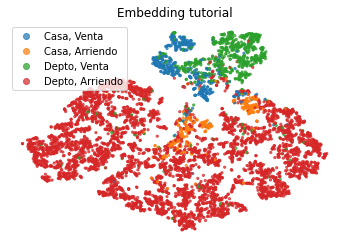

In [63]:

ax,scatter=visual.plot_from_graph(alpha=0.7,s=5)
ax.set_title("Embedding con colores el tipo de usuario")
ax.legend(handles=scatter.legend_elements()[0], labels=['Casa, Venta', 'Casa, Arriendo', 'Depto, Venta','Depto, Arriendo'])
plt.show()

O a partir de un dataframe.


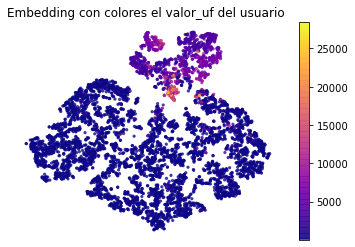

In [69]:
caracteristica="valor_uf"

ax,scatter=visual.plot_from_df(users,caracteristica, quantile=False,alpha=0.7,s=5)
ax.set_title("Embedding con colores el valor_uf del usuario ")
cb=plt.colorbar(scatter, ax=ax)


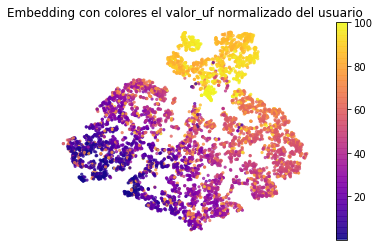

In [72]:
caracteristica="valor_uf"

ax,scatter=visual.plot_from_df(users,caracteristica, quantile=True,alpha=0.7,s=5)
ax.set_title("Embedding con colores el valor_uf normalizado del usuario")
cb=plt.colorbar(scatter, ax=ax)


Tambien se puede usar un subgrafo.

In [73]:

usuarios_depto_arriendo=users[(users["id_modalidad"]==2)&(users["id_tipo_propiedad"]==2)].index
G_chico=G.subgraph(usuarios_depto_arriendo)
visual = visualizer.NodeVisualizer(G_chico, emb,proyection_type="skTSNE")

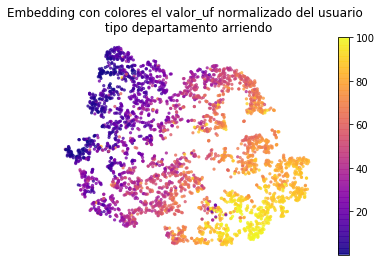

In [74]:
caracteristica="valor_uf"

ax,scatter=visual.plot_from_df(users,caracteristica, mode="quantile",alpha=0.7,s=5)
ax.set_title("Embedding con colores el valor_uf normalizado del usuario \n tipo departamento arriendo")
cb=plt.colorbar(scatter, ax=ax)


### Visualizacion de Enlaces

Carga del embedding.

In [81]:
tipo="bipartite"
method="gf"
dim="50"
emb = pd.read_csv("results/lp/"+tipo+"/"+method+"/"+dim+".txt",sep=" ",header=None,skiprows=[0],index_col=0)

G=graph_type[tipo]
G_test=grafos_test.B_f
emb.head()


1         2         3         4         5         6   \
0                                                                      
 721908   0.211775  0.183946  0.196466 -0.223709  0.213877 -0.140992   
-1528706  0.308628  0.330934  0.326374 -0.345096  0.298630  0.037740   
 766188   0.344653 -0.373841  0.385959  0.401023  0.378329 -0.374431   
-1525271 -0.448580 -0.326916  0.428928  0.452182 -0.156369  0.408428   
-1545836  0.243995 -0.251342  0.277341  0.104409  0.289051  0.258641   

                7         8         9         10  ...        41        42  \
0                                                 ...                       
 721908  -0.226259  0.187336 -0.148970 -0.220218  ...  0.210655  0.189920   
-1528706 -0.351634  0.333216 -0.044647 -0.351465  ...  0.367351  0.250212   
 766188  -0.378486  0.399174 -0.362316  0.338333  ...  0.369830 -0.380473   
-1525271 -0.446079  0.428012  0.410422  0.438893  ... -0.302419 -0.437669   
-1545836 -0.053896  0.278219 -0.041495  0.212992  ...  0.286510 -0.206065   

                43        44        45        46        47        48  \
0                                                                      
 721908   0.229684 -0.204271 -0.181521 -0.197466  0.195452  0.221278   
-1528706  0.396837 -0.330080 -0.254522 -0.252500  0.259808  0.360090   
 766188   0.365991  0.426358  0.369491 -0.406497 -0.369566  0.406704   
-1525271  0.417299 -0.372697 -0.442609 -0.456442 -0.415010  0.433701   
-1545836 -0.078078 -0.290159 -0.299358 -0.291543 -0.153963  0.179663   

                49        50  
0                             
 721908  -0.202136 -0.128456  
-1528706 -0.244994 -0.202926  
 766188   0.412168 -0.392974  
-1525271  0.394054 -0.432237  
-1545836 -0.301151 -0.166810  

[5 rows x 50 columns]

Para obtener el embedding de un enlace es necesario utilizar una de las cuatro tecnicas de embedding, EdgeVisualizer se encarga de eso, solo se le entrega el grafo y el tipo de embedding y calcula la proyeccion para n enlaces. Los n enlaces son muestreados de los enlaces totales y otros n son muestreados de los enlaces falsos.

In [93]:

importlib.reload(visualizer)
edgeemb="hadamard"
visual = visualizer.EdgeVisualizer(G, emb, proyection_type="skTSNE",emb_method=edgeemb,n=3000)


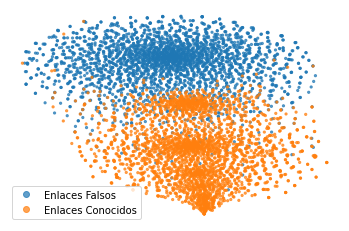

In [94]:

ax,scatter=visual.plot_from_graph(alpha=0.7,s=5)

plt.legend(handles=scatter.legend_elements()[0], labels=['Enlaces Falsos','Enlaces Conocidos','Enlaces Predichos'])


Tambien se puede agregar el grafo de testeo con el que comparar los enlaces futuros.

In [95]:

G_test=grafos_test.B
importlib.reload(visualizer)
edgeemb="hadamard"
visual = visualizer.EdgeVisualizer(G, emb,G_test, proyection_type="skTSNE",emb_method=edgeemb,n=3000)


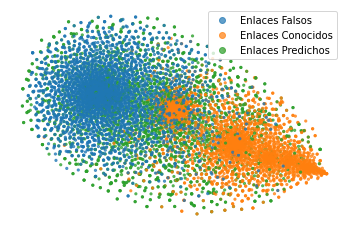

In [96]:

ax,scatter=visual.plot_from_graph(alpha=0.7,s=5)

plt.legend(handles=scatter.legend_elements()[0], labels=['Enlaces Falsos','Enlaces Conocidos','Enlaces Predichos'])


In [104]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

In [107]:
users.loc[1502540].values

array([1.6615384615384616, 1.6923076923076923, -33.45204475424246,
       -70.59510366575961, 2109.050292767885, '86b2c50b7ffffff',
       '88b2c50b67fffff', '8ab2c50b6707fff'], dtype=object)